In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv(r'.\penguins.csv')
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


Exploratory Data Analysis (EDA)

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [304]:
df = df.dropna(subset=['sex'])
df['sex'] = df['sex'].map({'MALE': 0, 'FEMALE': 1})

In [305]:
df.info()
df.dropna(inplace=True) 

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                334 non-null    float64
dtypes: float64(5)
memory usage: 15.7 KB


In [306]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,43.986826,17.173952,214.347305,4207.185629,0.494012
std,5.461540,1.973277,263.648447,804.009294,0.500714
min,32.100000,13.100000,-132.000000,2700.000000,0.000000
25%,39.500000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,0.000000
75%,48.575000,18.700000,213.000000,4768.750000,1.000000
max,59.600000,21.500000,5000.000000,6300.000000,1.000000


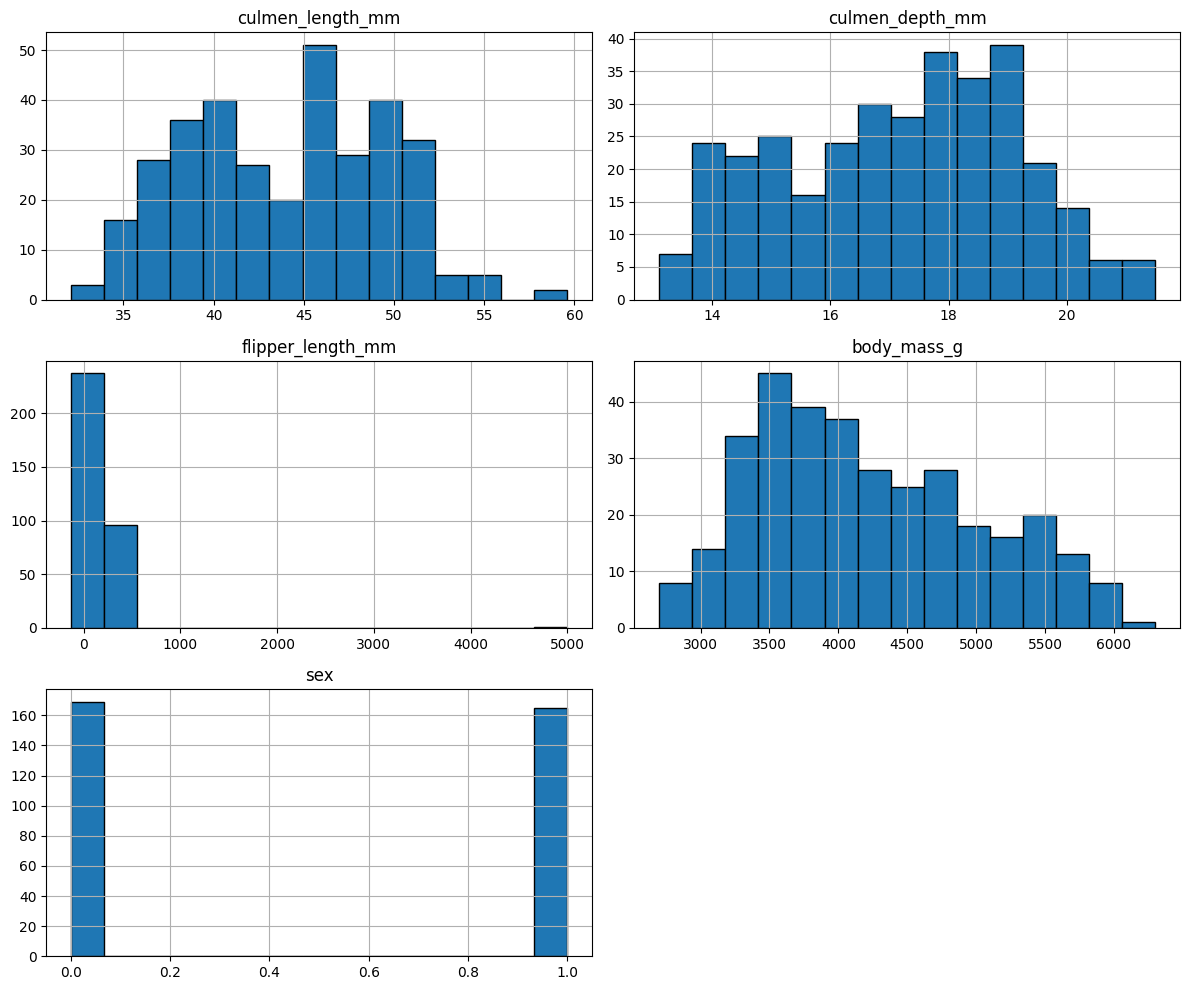

In [307]:
df.hist(figsize=(12, 10), bins=15, edgecolor='black')
plt.tight_layout()
plt.show()

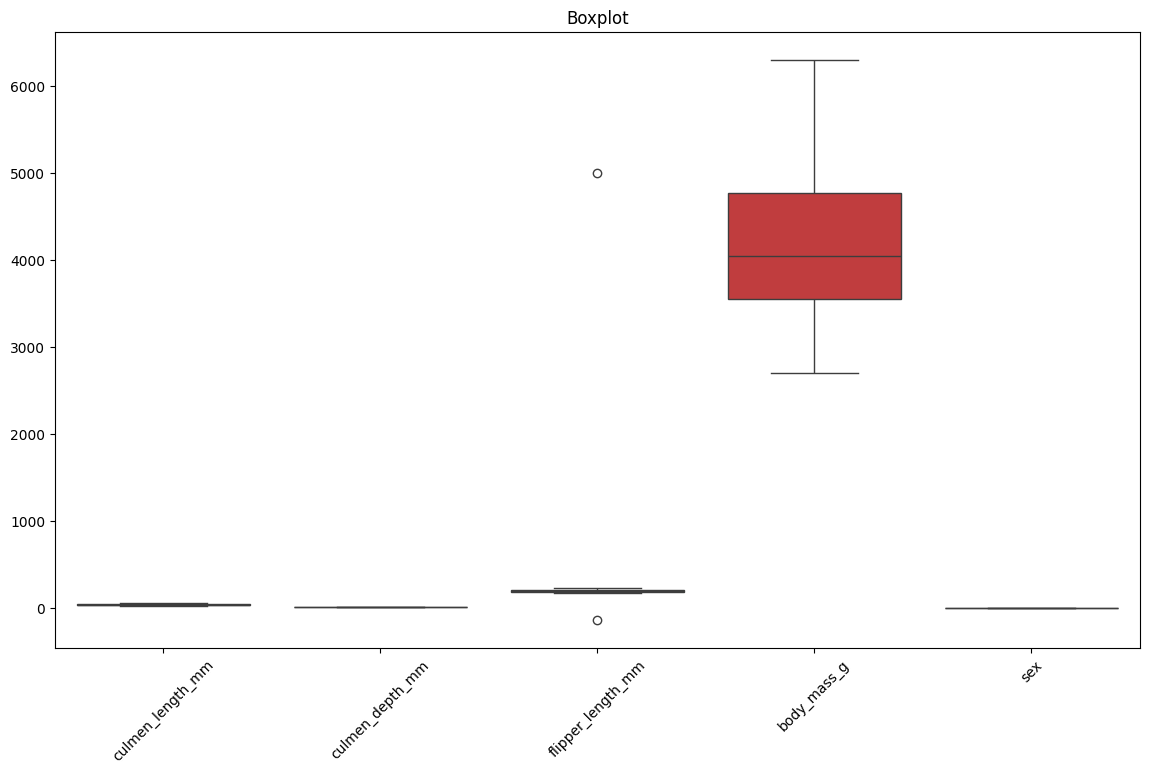

In [308]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplot')
plt.show()

In [309]:

num_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_clean = remove_outliers_iqr(df, num_cols)

K-Means Clustering

In [310]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean[num_cols])
df_scaled = pd.DataFrame(df_scaled, columns=num_cols)
df_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.903906,0.790360,-1.425342,-0.566948
1,-0.830434,0.126187,-1.068577,-0.504847
2,-0.683490,0.432728,-0.426399,-1.187953
3,-1.344738,1.096901,-0.569105,-0.939551
4,-0.867170,1.761074,-0.783164,-0.691149


In [311]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
scores = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(df_scaled)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(df_scaled, labels)
    scores.append(silhouette_avg)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

wcss score for n_cluster = 2 is [549.8988496689593]
silhoutte score for n_clusters = 2 is 0.5313685849858238
wcss score for n_cluster = 3 is [549.8988496689593, 367.5909049260901]
silhoutte score for n_clusters = 3 is 0.447862335700844
wcss score for n_cluster = 4 is [549.8988496689593, 367.5909049260901, 290.61237434368866]
silhoutte score for n_clusters = 4 is 0.40031290154047117
wcss score for n_cluster = 5 is [549.8988496689593, 367.5909049260901, 290.61237434368866, 227.02101478074218]
silhoutte score for n_clusters = 5 is 0.37295132047500396
wcss score for n_cluster = 6 is [549.8988496689593, 367.5909049260901, 290.61237434368866, 227.02101478074218, 199.068571246136]
silhoutte score for n_clusters = 6 is 0.36445945275475683
wcss score for n_cluster = 7 is [549.8988496689593, 367.5909049260901, 290.61237434368866, 227.02101478074218, 199.068571246136, 181.42761065663686]
silhoutte score for n_clusters = 7 is 0.3314570913851291
wcss score for n_cluster = 8 is [549.8988496689593, 3

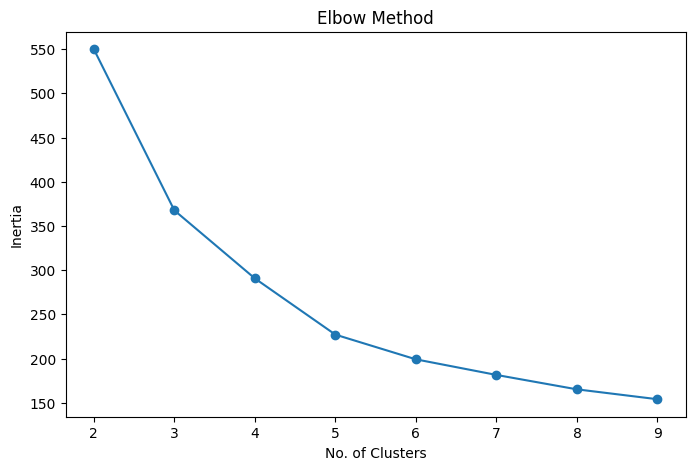

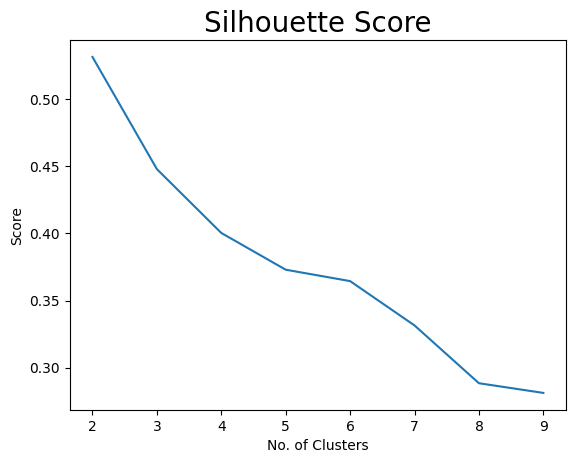

In [312]:
inertia = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

plt.plot(range(2, 10), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()



In [313]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_clean['Cluster'] = kmeans.fit_predict(df_scaled)

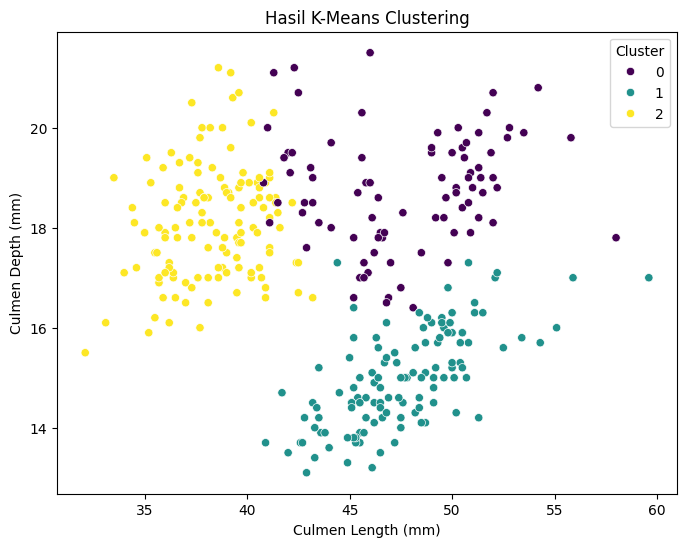

In [314]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_clean['culmen_length_mm'], y=df_clean['culmen_depth_mm'], hue=df_clean['Cluster'], palette='viridis')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Hasil K-Means Clustering')
plt.legend(title='Cluster')
plt.show()

Agglomerative Clustering

In [315]:
from sklearn.decomposition import PCA

# 2D PCA
pca = PCA(n_components=2) 
pca_data = pca.fit_transform(df_clean)  

linkage_col = ['ward', 'complete', 'average', 'single']
scores_all = [[] for _ in range(len(linkage_col))]
for j in range (len(linkage_col)):
    print('Linkage: ', linkage_col[j])
    scores = []
    for i in range(2, 10):
        AC = AgglomerativeClustering(n_clusters=i, linkage = linkage_col[j]) 
        AC.fit(pca_data)
        
        labels = AC.labels_
        silhouette_avg = silhouette_score(pca_data, labels)
        scores.append(silhouette_avg)
        print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))
    print("\n##########################\n")
    scores_all[j] = scores



Linkage:  ward
silhoutte score for n_clusters = 2 is 0.6310820373165108
silhoutte score for n_clusters = 3 is 0.515156571832955
silhoutte score for n_clusters = 4 is 0.5453023093407605
silhoutte score for n_clusters = 5 is 0.5167361241844097
silhoutte score for n_clusters = 6 is 0.5111779828203143
silhoutte score for n_clusters = 7 is 0.5160076629813555
silhoutte score for n_clusters = 8 is 0.5108909964243177
silhoutte score for n_clusters = 9 is 0.5125040447119555

##########################

Linkage:  complete
silhoutte score for n_clusters = 2 is 0.5865216349007837
silhoutte score for n_clusters = 3 is 0.5656333119359539
silhoutte score for n_clusters = 4 is 0.4834540578461623
silhoutte score for n_clusters = 5 is 0.5049461488290787
silhoutte score for n_clusters = 6 is 0.4949592839600263
silhoutte score for n_clusters = 7 is 0.47239127969757055
silhoutte score for n_clusters = 8 is 0.4708751437888825
silhoutte score for n_clusters = 9 is 0.478163064416761

#########################

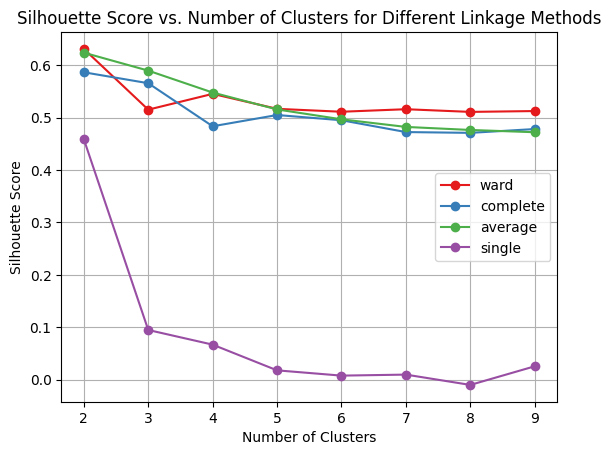

In [316]:
colors = sns.color_palette("Set1", len(linkage_col))

for j in range(len(linkage_col)):
    plt.plot(range(2, 10), scores_all[j], marker='o', color=colors[j], label=linkage_col[j])

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for Different Linkage Methods')
plt.legend()
plt.grid(True)
plt.show()

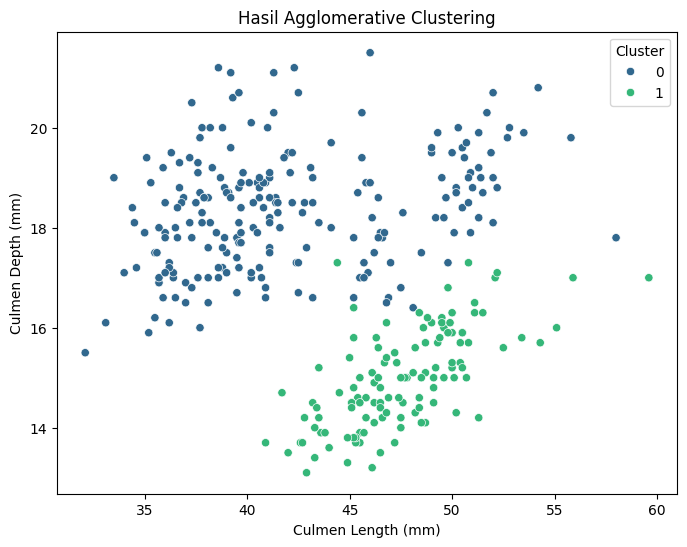

In [317]:
optimal_k = 2
agglo = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
df_clean['Cluster'] = agglo.fit_predict(df_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_clean['culmen_length_mm'], y=df_clean['culmen_depth_mm'], hue=df_clean['Cluster'], palette='viridis')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Hasil Agglomerative Clustering')
plt.legend(title='Cluster')
plt.show()

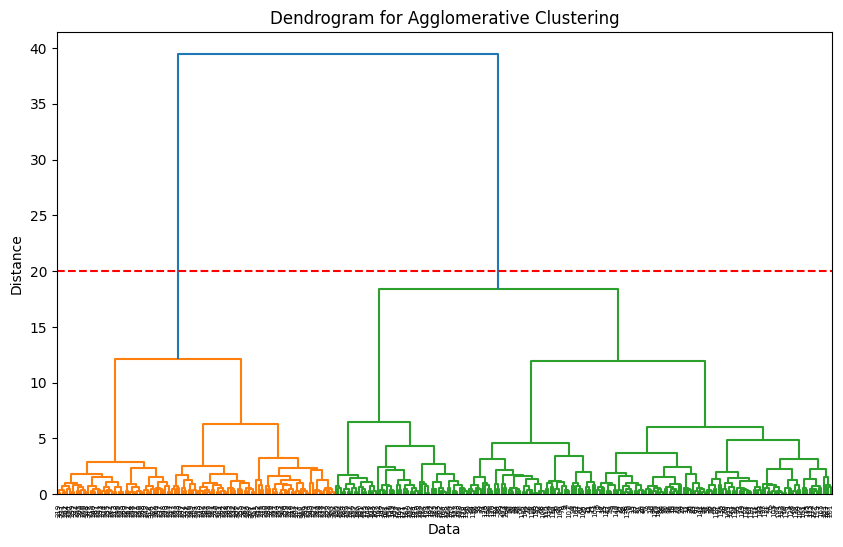

In [318]:
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.axhline(y=20, color='r', linestyle='--') 
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data')
plt.ylabel('Distance')
plt.show()